In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
train_df=pd.read_csv('../input/digit-recognizer/train.csv')
train_df.shape
train_df.head()

(42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_test=pd.read_csv('../input/digit-recognizer/test.csv')
x_test.shape
x_test.head()

(28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train=train_df['label']
x_train=train_df.iloc[:,1:786]

In [7]:
x_train.shape
y_train.shape

(42000, 784)

(42000,)

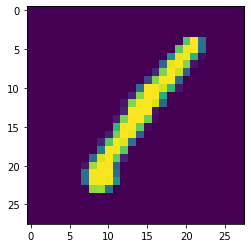

In [8]:
plt.imshow(x_train.iloc[0,:].values.reshape(28, 28))

<AxesSubplot:>

<AxesSubplot:>

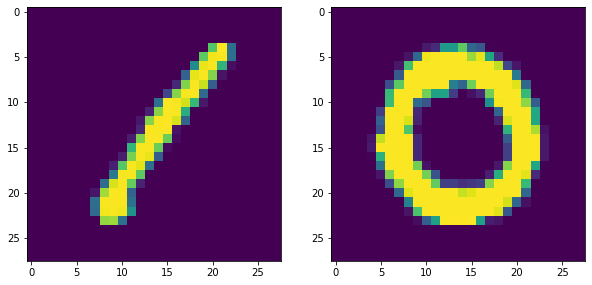

In [9]:
fig = plt.figure(figsize=(10, 5))
rows=1
col=2
fig.add_subplot(rows, col, 1)
plt.imshow(x_train.iloc[0,:].values.reshape(28, 28))

fig.add_subplot(rows, col, 2)
plt.imshow(x_train.iloc[1,:].values.reshape(28, 28))

In [10]:
y_train[0]
y_train[1]

1

0

In [11]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [12]:
sum(y_train.isnull())

0

In [13]:
x1_t, x_val, y1_t, y_val=train_test_split(x_train, y_train, test_size=0.1, shuffle=True, random_state=1)
x1_t.shape
x_val.shape

(37800, 784)

(4200, 784)

In [14]:
img_rows, img_cols=28, 28
input_shape=(img_rows, img_cols, 1)

x1_t=x1_t.values.reshape(x1_t.shape[0], img_rows, img_cols, 1)
x_val=x_val.values.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_test=x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)

x1_t.shape

(37800, 28, 28, 1)

8

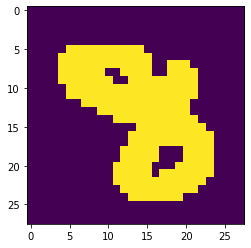

In [15]:

x1_t=tf.keras.utils.normalize(x1_t)
plt.imshow(x1_t[1])
np.array(y1_t)[1] #we have to conver it to array, otherwise in series the indexes are also shuffled

In [16]:
n=y1_t.unique()
n_classes=n.shape[0]
n_classes

10

In [17]:
y1_t=to_categorical(y1_t, n_classes)
y_val=to_categorical(y_val, n_classes)
y1_t.shape

(37800, 10)

In [18]:
model=Sequential()

model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=20, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=20, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation='softmax'))

learning_rate=0.001

model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 20)        1

In [19]:
#Save the model during training 

from tensorflow.keras.callbacks import ModelCheckpoint
save_at = "/kaggle/working/model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [20]:
history=model.fit(x1_t, y1_t, epochs=10, batch_size=32, callbacks=[save_best], verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
1182/1182 [==============================] - 34s 28ms/step - loss: 0.4130 - accuracy: 0.8667 - val_loss: 619.0166 - val_accuracy: 0.3986
Epoch 2/10
1182/1182 [==============================] - 32s 27ms/step - loss: 0.0903 - accuracy: 0.9726 - val_loss: 292.4209 - val_accuracy: 0.5519
Epoch 3/10
1182/1182 [==============================] - 32s 27ms/step - loss: 0.0646 - accuracy: 0.9798 - val_loss: 129.9277 - val_accuracy: 0.7526
Epoch 4/10
1182/1182 [==============================] - 33s 28ms/step - loss: 0.0496 - accuracy: 0.9842 - val_loss: 248.9234 - val_accuracy: 0.6498
Epoch 5/10
1182/1182 [==============================] - 33s 28ms/step - loss: 0.0508 - accuracy: 0.9842 - val_loss: 131.6022 - val_accuracy: 0.7360
Epoch 6/10
1182/1182 [==============================] - 33s 28ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 186.6751 - val_accuracy: 0.6774
Epoch 7/10
1182/1182 [==============================] - 33s 28ms/step - loss: 0.0384 - accuracy: 0.9884 - val_lo